Proyecto

In [1]:
#Improtamos las librerias
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
Tabla = pd.read_excel('medidas.xlsx') #Se utliza la libreria pandas para crear el dataframe
Tabla.head()

,wavelength,value (M1),value (M2),value (M3),value (M4),value (M5),value (M6)
0,220,2.19867,1.32533,0.69367,0.38867,0.22733,0.13433
1,221,2.19867,1.32400,0.69100,0.38667,0.22800,0.13267
2,222,2.19867,1.30900,0.68200,0.38167,0.22467,0.13000
3,223,2.19867,1.28867,0.66967,0.37433,0.21967,0.12767
4,224,2.18800,1.26400,0.65667,0.36600,0.21400,0.12533


Visualización del espectro UV del Ibuprofeno

In [3]:
AbsorbanceM1=Tabla['value (M1)']   #Seleccionamos los datos de Aborbancia de la concentración 1 en la tabla de datos
wavelength = Tabla['wavelength']  #Seleccionamos los datos de Longitud de Onda de la concentración 1 en la tabla de datos

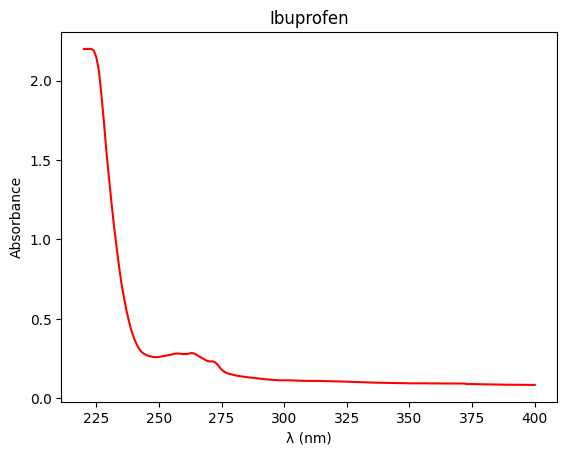

In [4]:
#Graficamos el Espectro UV del Ibuprofeno en una conentración de 0,7 mg/ml
plt.figure() 
plt.plot(wavelength, AbsorbanceM1, color='red', linestyle='solid')
plt.title('Ibuprofen')
plt.xlabel('λ (nm)')
plt.ylabel('Absorbance')
plt.show()